###### Load the dataset “Online_Retail” provided into pandas dataframe.   
###### o Process any missing values. Create descriptive statistics.(Use of numpy)   
###### o Plot time series of price using pandas functionality. Filter transactions based on date. 
###### o Plot time series chart of price where quantity less than 1000 and in year 2011. 
###### o Calculate total amount of price in pivot table based on product description. 
###### o Which country has highest price and for which product? 
###### o Calculate top 10 products with minimum price and in year 2010.

In [2]:
import numpy as np 

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('online_retail.csv')

In [5]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
437880,C553031,22300,COFFEE MUG DOG + BALL DESIGN,-1,12-05-2011 19:43,2.55,13908.0,United Kingdom
437881,C553031,21533,RETROSPOT LARGE MILK JUG,-3,12-05-2011 19:43,4.95,13908.0,United Kingdom
437882,C553031,21240,BLUE POLKADOT CUP,-3,12-05-2011 19:43,0.85,13908.0,United Kingdom
437883,C553032,22891,TEA FOR ONE POLKADOT,-3,12-05-2011 19:44,4.25,13320.0,United Kingdom


In [6]:
df.Description


0         15CM CHRISTMAS GLASS BALL 20 LIGHTS
1                          PINK CHERRY LIGHTS
2                         WHITE CHERRY LIGHTS
3                RECORD FRAME 7" SINGLE SIZE 
4              STRAWBERRY CERAMIC TRINKET BOX
                         ...                 
437880           COFFEE MUG DOG + BALL DESIGN
437881               RETROSPOT LARGE MILK JUG
437882                      BLUE POLKADOT CUP
437883                   TEA FOR ONE POLKADOT
437884               CIRCUS PARADE LUNCH BOX 
Name: Description, Length: 437885, dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
437880  C553031     22300         COFFEE MUG DOG + BALL DESIGN        -1   
437881  C553031     21533             RETROSPOT LARGE MILK JUG        -3   
437882  C553031     21240                    BLUE POLKADOT CUP        -3   
437883  C553032     22891                 TEA FOR ONE POLKADOT        -3   
437884  C553032     22631             CIRCUS PARADE LUNCH BOX         -3   

             InvoiceDate  Price  Customer ID         

In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2723
Quantity            0
InvoiceDate         0
Price               0
Customer ID    110775
Country             0
dtype: int64

In [9]:
removed_null=df.dropna(subset=['Description','Customer ID'],inplace=True)

In [10]:
df.describe

<bound method NDFrame.describe of         Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
437880  C553031     22300         COFFEE MUG DOG + BALL DESIGN        -1   
437881  C553031     21533             RETROSPOT LARGE MILK JUG        -3   
437882  C553031     21240                    BLUE POLKADOT CUP        -3   
437883  C553032     22891                 TEA FOR ONE POLKADOT        -3   
437884  C553032     22631             CIRCUS PARADE LUNCH BOX         -3   

             InvoiceDate  Price  Customer ID         

In [11]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
df.size

2616880

In [13]:
df.describe()

,Quantity,Price,Customer ID
count,327110.000000,327110.000000,327110.000000
mean,12.971734,3.950415,15309.727813
std,207.017278,74.134111,1697.582041
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13901.000000
50%,5.000000,1.950000,15215.000000
75%,12.000000,3.750000,16801.000000
max,74215.000000,25111.090000,18287.000000


In [14]:
df['Total Amount']=df['Quantity']*df['Price']

In [15]:
df['Total Amount']

0          83.40
1          81.00
2          81.00
3         100.80
4          30.00
           ...  
437880     -2.55
437881    -14.85
437882     -2.55
437883    -12.75
437884     -5.85
Name: Total Amount, Length: 327110, dtype: float64

In [16]:
df[['Quantity','Price','Total Amount']]

,Quantity,Price,Total Amount
0,12,6.95,83.40
1,12,6.75,81.00
2,12,6.75,81.00
3,48,2.10,100.80
4,24,1.25,30.00
...,...,...,...
437880,-1,2.55,-2.55
437881,-3,4.95,-14.85
437882,-3,0.85,-2.55
437883,-3,4.25,-12.75


In [17]:
table=df.pivot_table(values='Total Amount', index='Description' , aggfunc=sum )

C:\Users\VipulGhodke\AppData\Local\Temp\ipykernel_6792\1979502902.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table=df.pivot_table(values='Total Amount', index='Description' , aggfunc=sum )


In [ ]:
print(table)

                                     Total Amount
Description                                      
  DOORMAT UNION JACK GUNS AND ROSES       1084.75
 3 STRIPEY MICE FELTCRAFT                 1227.45
 4 PURPLE FLOCK DINNER CANDLES              63.75
 ANIMAL STICKERS                            80.85
 BLACK PIRATE TREASURE CHEST                77.55
...                                           ...
ZINC T-LIGHT HOLDER STARS SMALL            908.31
ZINC TOP  2 DOOR WOODEN SHELF             1050.35
ZINC WILLIE WINKIE  CANDLE STICK          1746.44
ZINC WIRE KITCHEN ORGANISER                 20.80
ZINC WIRE SWEETHEART LETTER TRAY            97.71

[4582 rows x 1 columns]


In [ ]:
highest_price=df['Price'].idxmax()
print(highest_price)

241824


In [20]:
highest_price_row=df.loc[highest_price]
print(highest_price_row)

Invoice                  C512770
StockCode                      M
Description               Manual
Quantity                      -1
InvoiceDate     17-06-2010 16:52
Price                   25111.09
Customer ID              17399.0
Country           United Kingdom
Total Amount           -25111.09
Name: 241824, dtype: object


In [21]:
print(f"country_having_maximum_price: {highest_price_row['Country']}\nfor the product: {highest_price_row['Description']}")

country_having_maximum_price: United Kingdom
for the product: Manual


In [22]:
minimum_price_idx=df['Price'].idxmin()
print(minimum_price_idx)

4674


In [23]:
minimum_price_row=df.loc[minimum_price_idx]
print(minimum_price_row)

Invoice                     489825
StockCode                    22076
Description     6 RIBBONS EMPIRE  
Quantity                        12
InvoiceDate       02-12-2009 13:34
Price                          0.0
Customer ID                16126.0
Country             United Kingdom
Total Amount                   0.0
Name: 4674, dtype: object


In [24]:
print(f"Country with minimum price: {minimum_price_row['Country']}\nfor the product: {minimum_price_row['Description']}")

Country with minimum price: United Kingdom
for the product: 6 RIBBONS EMPIRE  


In [25]:
# formating the date
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [26]:
df['InvoiceDate']

0        2009-12-01 07:45:00
1        2009-12-01 07:45:00
2        2009-12-01 07:45:00
3        2009-12-01 07:45:00
4        2009-12-01 07:45:00
                 ...        
437880   2011-05-12 19:43:00
437881   2011-05-12 19:43:00
437882   2011-05-12 19:43:00
437883   2011-05-12 19:44:00
437884   2011-05-12 19:44:00
Name: InvoiceDate, Length: 327110, dtype: datetime64[ns]

In [27]:
df['year']=df['InvoiceDate'].dt.year
df['year']

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
437880    2011
437881    2011
437882    2011
437883    2011
437884    2011
Name: year, Length: 327110, dtype: int32

In [28]:
year_2010_data=df[df['InvoiceDate'].dt.year==2010]


In [29]:
print(year_2010_data)

        Invoice StockCode                        Description  Quantity  \
45228    493410   TEST001            This is a test product.         5   
45229   C493411     21539            RETRO SPOTS BUTTER DISH        -1   
45230    493412   TEST001            This is a test product.         5   
45234    493414     21844                     RETRO SPOT MUG        36   
45235    493414     21533          RETRO SPOT LARGE MILK JUG        12   
...         ...       ...                                ...       ...   
292022   539988     84380  SET OF 3 BUTTERFLY COOKIE CUTTERS         1   
292023   539988    84849D              HOT BATHS SOAP HOLDER         1   
292024   539988    84849B             FAIRY SOAP SOAP HOLDER         1   
292025   539988     22854        CREAM SWEETHEART EGG HOLDER         2   
292026   539988    47559B                TEA TIME OVEN GLOVE         2   

               InvoiceDate  Price  Customer ID         Country  Total Amount  \
45228  2010-01-04 09:24:00   4.

In [30]:
top_10_maximum_price=year_2010_data.nlargest(10,'Price')

In [31]:
print(top_10_maximum_price)

        Invoice StockCode Description  Quantity         InvoiceDate     Price  \
241824  C512770         M      Manual        -1 2010-06-17 16:52:00  25111.09   
135012  C502262         M      Manual        -1 2010-03-23 15:20:00  10953.50   
135013   502263         M      Manual         1 2010-03-23 15:22:00  10953.50   
135014  C502264         M      Manual        -1 2010-03-23 15:24:00  10953.50   
74356    496115         M      Manual         1 2010-01-29 11:04:00   8985.60   
74357   C496116         M      Manual        -1 2010-01-29 11:05:00   8985.60   
129902  C501751         M      Manual        -1 2010-03-19 11:30:00   6958.17   
129903   501766         M      Manual         1 2010-03-19 11:35:00   6958.17   
129987   501768         M      Manual         1 2010-03-19 11:45:00   6958.17   
129988  C501769         M      Manual        -1 2010-03-19 11:49:00   6958.17   

        Customer ID         Country  Total Amount  year  
241824      17399.0  United Kingdom     -25111.09 

In [32]:
# printing top 10 lowest price in 2010
print(df[df['InvoiceDate'].dt.year==2010].nsmallest(10,'Price')[['Price']])

        Price
47126     0.0
48342     0.0
57619     0.0
89084     0.0
89180     0.0
111348    0.0
149201    0.0
149202    0.0
166143    0.0
232526    0.0


<Axes: title={'center': 'Time Series of Price'}, xlabel='InvoiceDate'>

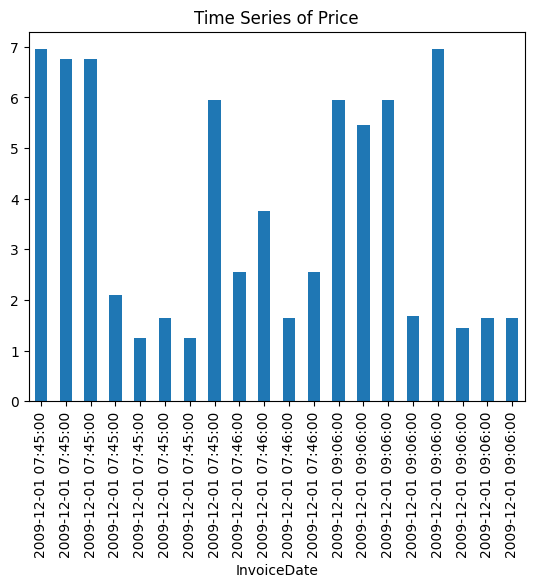

In [33]:
start_date = "2009-12-01"   # The start date
end_date = "2009-12-02"     # The end date
df_filtered=df[(df["InvoiceDate"] >= start_date) & (df["InvoiceDate"]<=end_date)]   # storing only the dates between start and end date
 
# Set the 'InvoiceDate' column as the index of the DataFrame
# This is useful for time series analysis and operations that require date-based indexing
df_filtered.set_index("InvoiceDate",inplace=True)  
 
# Plot the first 20 rows of the 'Price' column as a bar chart
# 'x' and 'y' parameters are not needed here as the index is already set to 'InvoiceDate'
df_filtered.head(20)["Price"].plot(x="InvoiceDate", y="Price",title="Time Series of Price",kind="bar")

<Axes: title={'center': 'Time Series of Price'}, xlabel='InvoiceDate'>

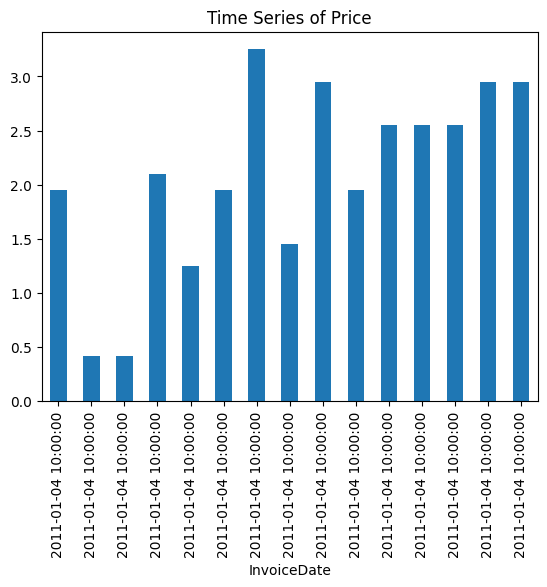

In [34]:
# Filter the DataFrame for rows where 'Quantity' is less than 1000 and 'InvoiceDate' is in the year 2011
df_new=df[(df["Quantity"]<1000) & (df["InvoiceDate"].dt.year==2011)]
 
# Set the 'InvoiceDate' column as the index of the filtered DataFrame
df_new.set_index("InvoiceDate",inplace=True)
 
# Plot the first 15 rows of the 'Price' column as a bar chart
# 'x' and 'y' parameters are not needed here as the index is already set to 'InvoiceDate'
df_new.head(15)["Price"].plot(title="Time Series of Price",kind="bar")